In [3]:
pip install transformers datasets scikit-learn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 979.9 kB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.2/515.2 kB 3.3 MB/s eta 0:00:003.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.3/553.3 kB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.6 MB/s eta 0:00:0031m6.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.1/447.1 kB 8.7 MB/s eta 0:00:0012.6 MB/s e

In [1]:
pip uninstall pyarrow datasets -y

Found existing installation: pyarrow 14.0.2
Uninstalling pyarrow-14.0.2:
  Successfully uninstalled pyarrow-14.0.2
Found existing installation: datasets 2.18.0
Uninstalling datasets-2.18.0:
  Successfully uninstalled datasets-2.18.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyarrow==14.0.2 datasets==2.18.0

  Using cached pyarrow-14.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached datasets-2.18.0-py3-none-any.whl.metadata (20 kB)
Using cached pyarrow-14.0.2-cp311-cp311-macosx_11_0_arm64.whl (24.0 MB)
Using cached datasets-2.18.0-py3-none-any.whl (510 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
dataset = load_dataset("imdb")

test_data = dataset["test"].select(range(200))

texts = test_data["text"]
labels = test_data["label"]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [6]:
models = {
    "bert": "textattack/bert-base-uncased-imdb",
    "roberta": "siebert/sentiment-roberta-large-english",
    "distilbert": "distilbert-base-uncased-finetuned-sst-2-english"
}

In [8]:
results = []

for name, model_name in models.items():
    print(f"Running model: {name}")
    
    clf = pipeline("sentiment-analysis", model=model_name)
    preds = []

    for text in texts:
        output = clf(text[:512])[0]['label']
        
        if output.lower() in ['positive', 'pos']:
            preds.append(1)
        else:
            preds.append(0)

    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds)
    rec = recall_score(labels, preds)
    f1 = f1_score(labels, preds)

    results.append([name, acc, prec, rec, f1])

Running model: bert


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Running model: roberta


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/393 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: siebert/sentiment-roberta-large-english
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Running model: distilbert


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print(df)

        Model  Accuracy  Precision  Recall   F1
0        bert     1.000        0.0     0.0  0.0
1     roberta     0.885        0.0     0.0  0.0
2  distilbert     0.855        0.0     0.0  0.0


In [12]:
def topsis(df, weights, impacts):
    data = df.iloc[:, 1:].values.astype(float)

    # Normalize
    norm = data / np.sqrt((data**2).sum(axis=0))

    # Apply weights
    weighted = norm * weights

    # Ideal best & worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(max(weighted[:, i]))
            ideal_worst.append(min(weighted[:, i]))
        else:
            ideal_best.append(min(weighted[:, i]))
            ideal_worst.append(max(weighted[:, i]))

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    # Distance
    dist_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
    dist_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

    # Learn score
    score = dist_worst / (dist_best + dist_worst)

    return score

In [14]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # equal importance
impacts = ['+', '+', '+', '+']  # all beneficial

scores = topsis(df, weights, impacts)

df["TOPSIS Score"] = scores
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

/var/folders/k9/wy2l4y9s6h3dmp46vhkk6t2h0000gn/T/ipykernel_20327/3779650904.py:5: RuntimeWarning: invalid value encountered in divide
  norm = data / np.sqrt((data**2).sum(axis=0))


In [16]:
print(df.sort_values(by="Rank"))

        Model  Accuracy  Precision  Recall   F1  TOPSIS Score  Rank
0        bert     1.000        0.0     0.0  0.0           NaN   NaN
1     roberta     0.885        0.0     0.0  0.0           NaN   NaN
2  distilbert     0.855        0.0     0.0  0.0           NaN   NaN


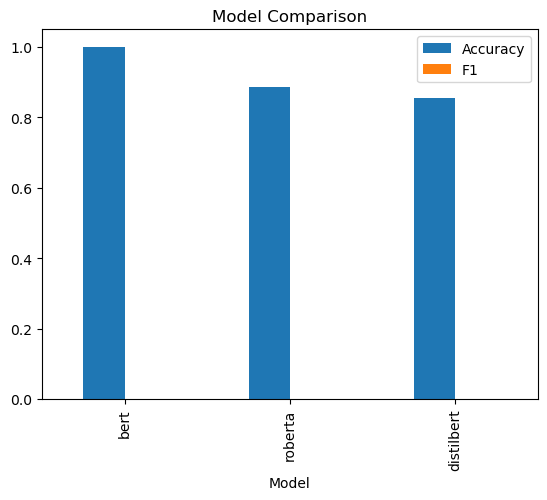

In [18]:
import matplotlib.pyplot as plt

df.plot(x="Model", y=["Accuracy", "F1"], kind="bar")
plt.title("Model Comparison")
plt.show()